<a href="https://colab.research.google.com/github/sumaiyalamia/6220_40221319/blob/main/Principal_Component_Analysis_and_Human_Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

# **Import Libraries**

In [352]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.datasets import make_blobs
from scipy.stats import beta
from scipy.stats import f

# import the metrics class
from sklearn import metrics

from itertools import cycle

import matplotlib as mpl


# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [191]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The “Human Stress Detectionn through Sleep Data Set” used for Principle Component Analysis (PCA) and classification models is obtained from Kaggle. The data set provided information about stress levels to detect as low/normal, medium low, medium, medium high, or high.

There are 8 attributes with 630 entries and one column for classification. 0 represents Low/Normal, 1 represents Medium Low, 2 represents Medium, 3 represents Medium High and 4 represents High.

All attributes are numerical and they are listed bellow:

snoring rate= sr
respiration rate = rr
body temperature = t
limb movement = lm
blood oxygen = bo
eye movement = rem
sleeping hours = sr.1
heart rate = hr
stress level (Label)

The original dataset can be found on below link: https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep?select=SaYoPillow.csv

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/sumaiyalamia/INSE6220_40221319/main/SaYoPillow.csv')
df.head(25)

sr      rr       t      lm      bo     rem   sr.1     hr  sl
0   93.800  25.680  91.840  16.600  89.840   99.60  1.840  74.20   3
1   91.640  25.104  91.552  15.880  89.552   98.88  1.552  72.76   3
2   60.000  20.000  96.000  10.000  95.000   85.00  7.000  60.00   1
3   85.760  23.536  90.768  13.920  88.768   96.92  0.768  68.84   3
4   48.120  17.248  97.872   6.496  96.248   72.48  8.248  53.12   0
5   56.880  19.376  95.376   9.376  94.064   83.44  6.376  58.44   1
6   47.000  16.800  97.200   5.600  95.800   68.00  7.800  52.00   0
7   50.000  18.000  99.000   8.000  97.000   80.00  9.000  55.00   0
8   45.280  16.112  96.168   4.224  95.112   61.12  7.112  50.28   0
9   55.520  19.104  95.104   9.104  93.656   82.76  6.104  57.76   1
10  73.440  21.344  93.344  11.344  91.344   91.72  4.016  63.36   2
11  59.280  19.856  95.856   9.856  94.784   84.64  6.856  59.64   1
12  48.600  17.440  98.160   6.880  96.440   74.40  8.440  53.60   0
13  96.288  26.288  85.360  17.144  82.432  100.36  0.000  75.72   4
14  87.800  24.080  91.040  14.600  89.040   97.60  1.040  70.20   3
15  52.320  18.464  94.464   8.464  92.696   81.16  5.464  56.16   1
16  52.640  18.528  94.528   8.528  92.792   81.32  5.528  56.32   1
17  86.240  23.664  90.832  14.080  88.832   97.08  0.832  69.16   3
18  81.560  22.416  90.208  12.520  88.208   95.52  0.208  66.04   3
19  63.680  20.368  92.368  10.368  90.368   86.84  2.552  60.92   2
20  77.600  21.760  93.760  11.760  91.760   93.80  4.640  64.40   2
21  77.280  21.728  93.728  11.728  91.728   93.64  4.592  64.32   2
22  69.760  20.976  92.976  10.976  90.976   89.88  3.464  62.44   2
23  88.040  24.144  91.072  14.680  89.072   97.68  1.072  70.36   3
24  89.960  24.656  91.328  15.320  89.328   98.32  1.328  71.64   3

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [8]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [9]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [10]:
df.index.is_unique

True

# Exploratory Data Analysis

*Pairplot*

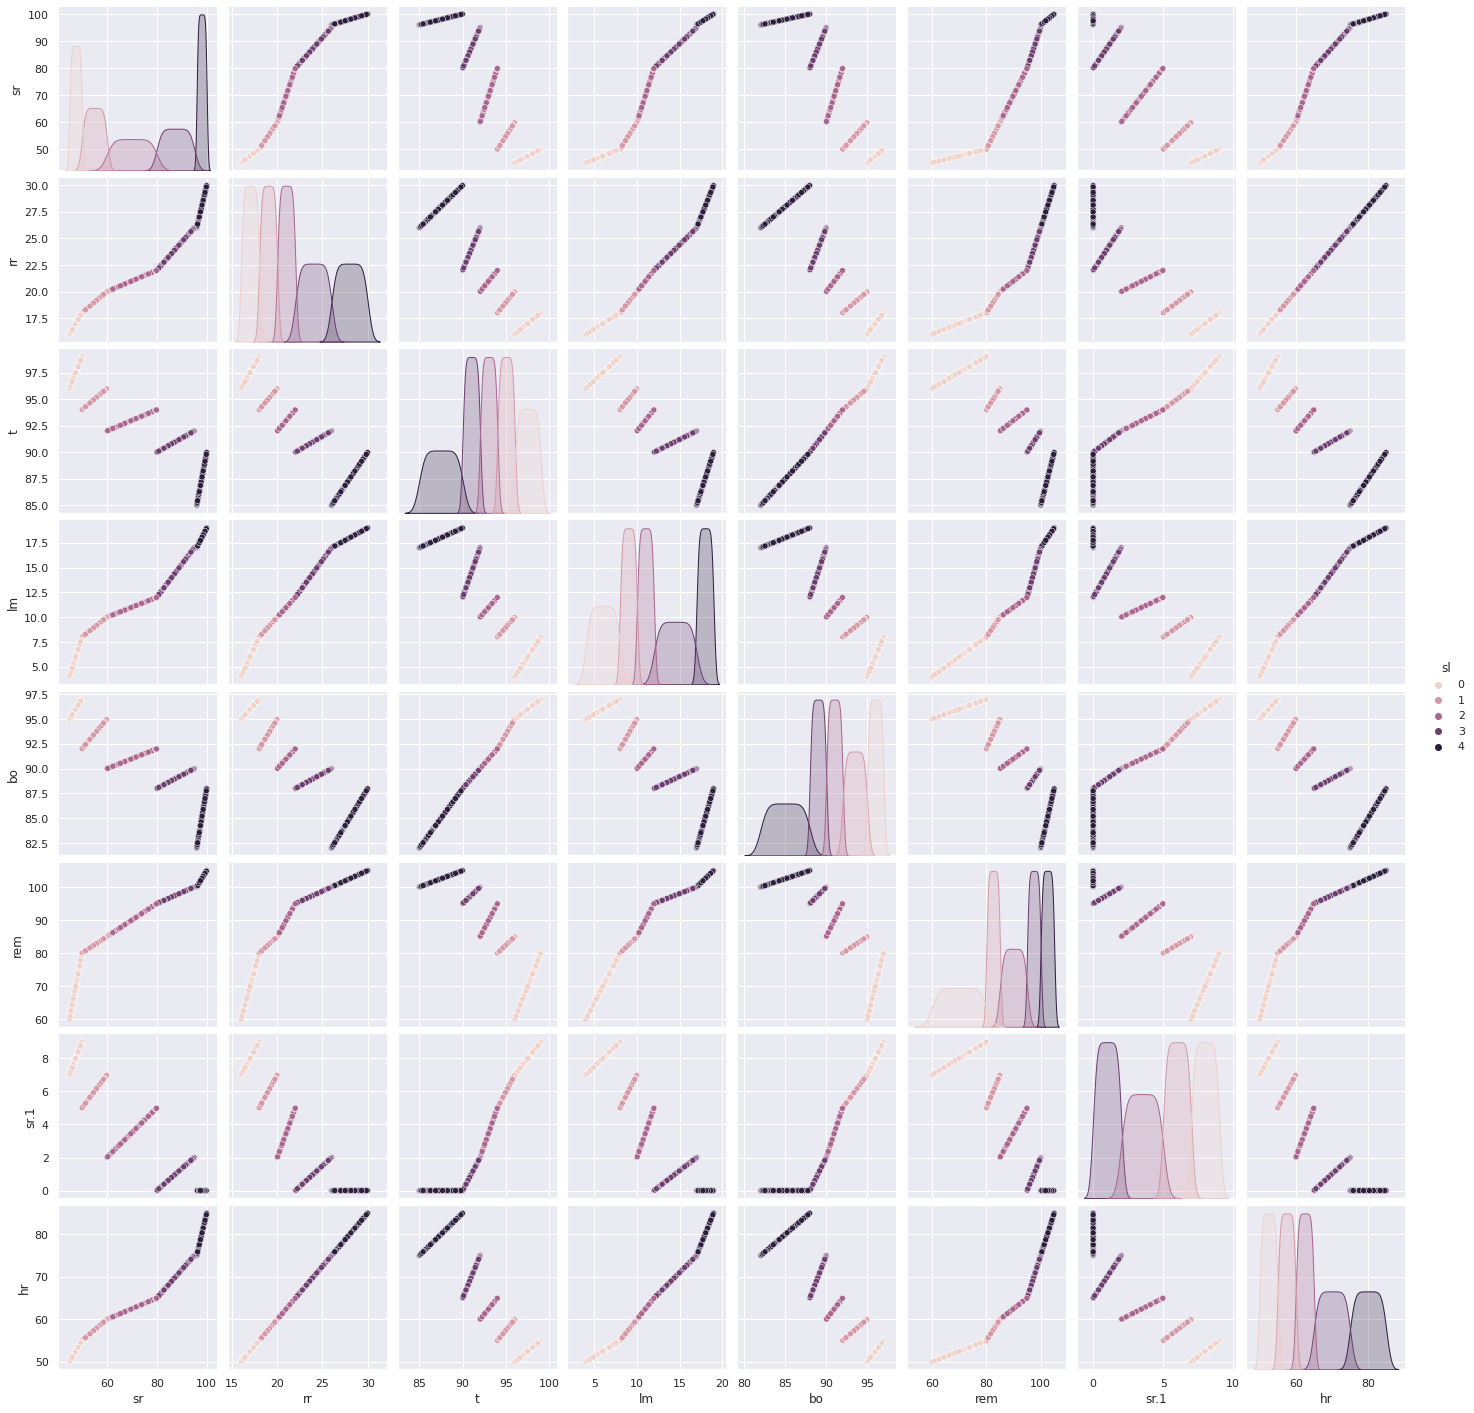

In [11]:
sns.pairplot(df, hue='sl')

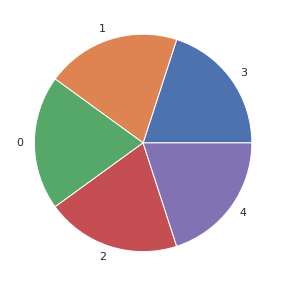

In [12]:
y =df['sl']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [13]:
X = df.drop(columns=['sl'])
X.head(10)

sr      rr       t      lm      bo    rem   sr.1     hr
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12
5  56.88  19.376  95.376   9.376  94.064  83.44  6.376  58.44
6  47.00  16.800  97.200   5.600  95.800  68.00  7.800  52.00
7  50.00  18.000  99.000   8.000  97.000  80.00  9.000  55.00
8  45.28  16.112  96.168   4.224  95.112  61.12  7.112  50.28
9  55.52  19.104  95.104   9.104  93.656  82.76  6.104  57.76

In [15]:
X.describe().transpose()

count  mean        std   min    25%   50%    75%    max
sr    630.0  71.6  19.372833  45.0  52.50  70.0  91.25  100.0
rr    630.0  21.8   3.966111  16.0  18.50  21.0  25.00   30.0
t     630.0  92.8   3.529690  85.0  90.50  93.0  95.50   99.0
lm    630.0  11.7   4.299629   4.0   8.50  11.0  15.75   19.0
bo    630.0  90.9   3.902483  82.0  88.50  91.0  94.25   97.0
rem   630.0  88.5  11.893747  60.0  81.25  90.0  98.75  105.0
sr.1  630.0   3.7   3.054572   0.0   0.50   3.5   6.50    9.0
hr    630.0  64.5   9.915277  50.0  56.25  62.5  72.50   85.0

 **Standardize the Data**

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

sr        rr         t        lm        bo       rem      sr.1  \
0  1.146845  0.979066 -0.272195  1.140539 -0.271838  0.934005 -0.609407   
1  1.035260  0.833720 -0.353853  0.972949 -0.345696  0.873421 -0.703767   
2 -0.599252 -0.454206  0.907316 -0.395697  1.051448 -0.294506  1.081206   
3  0.731501  0.438056 -0.576145  0.516734 -0.546753  0.708498 -0.960635   
4 -1.212970 -1.148636  1.438095 -1.211299  1.371498 -1.347997  1.490099   
5 -0.760431 -0.611664  0.730389 -0.540941  0.811410 -0.425772  0.876760   
6 -1.270828 -1.261683  1.247559 -1.419854  1.256609 -1.724964  1.343317   
7 -1.115849 -0.958879  1.757924 -0.861223  1.564349 -0.715229  1.736483   
8 -1.359683 -1.435290  0.954950 -1.740136  1.080170 -2.303879  1.117902   
9 -0.830688 -0.680299  0.653267 -0.604253  0.706778 -0.482990  0.787642   

         hr  
0  0.979066  
1  0.833720  
2 -0.454206  
3  0.438056  
4 -1.148636  
5 -0.611664  
6 -1.261683  
7 -0.958879  
8 -1.435290  
9 -0.680299

In [17]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
sr    630.0  2.904202e-16  1.000795 -1.374148 -0.986700 -0.082656  1.015113   
rr    630.0 -1.832749e-16  1.000795 -1.463552 -0.832711 -0.201869  0.807477   
t     630.0  8.007704e-16  1.000795 -2.211582 -0.652133  0.056707  0.765548   
lm    630.0  1.719965e-16  1.000795 -1.792275 -0.744842 -0.162934  0.942690   
bo    630.0 -1.452101e-15  1.000795 -2.282411 -0.615482  0.025645  0.859110   
rem   630.0  5.639228e-18  1.000795 -2.398121 -0.610048  0.126217  0.862482   
sr.1  630.0 -5.216286e-17  1.000795 -1.212261 -1.048442 -0.065528  0.917387   
hr    630.0  4.229421e-18  1.000795 -1.463552 -0.832711 -0.201869  0.807477   

           max  
sr    1.467135  
rr    2.069159  
t     1.757924  
lm    1.699170  
bo    1.564349  
rem   1.388386  
sr.1  1.736483  
hr    2.069159

**Observations and variables**

In [18]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

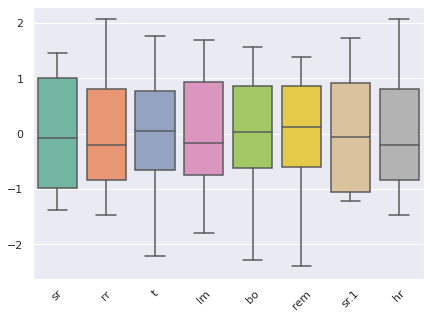

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

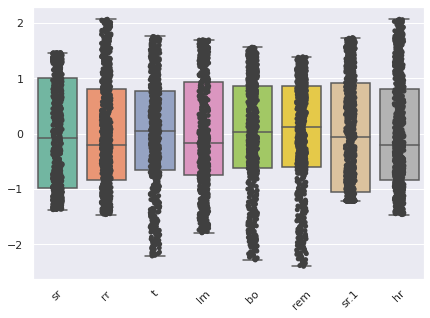

In [20]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

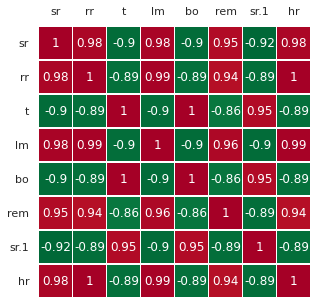

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)** 

Text(0, 0.5, '$Z_2$')

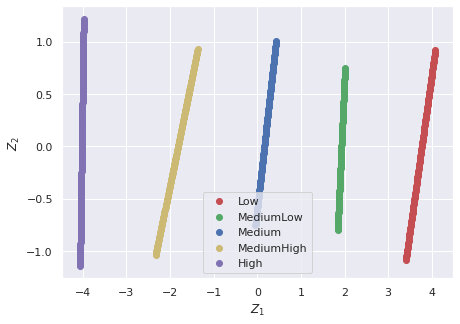

In [23]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Low)->0,  2(MediumLow)->1, 3(Medium)->2, 4(MediumHigh)->3, 5(High)->4
idx_Low = np.where(y == 0)
idx_MediumLow = np.where(y == 1)
idx_Medium = np.where(y == 2)
idx_MediumHigh = np.where(y == 3)
idx_High = np.where(y == 4)

plt. figure()
plt.scatter(Z[idx_Low,0], Z[idx_Low,1], c='r', label='Low')
plt.scatter(Z[idx_MediumLow,0], Z[idx_MediumLow,1], c='g', label='MediumLow')
plt.scatter(Z[idx_Medium,0], Z[idx_Medium,1], c='b', label='Medium')
plt.scatter(Z[idx_MediumHigh,0], Z[idx_MediumHigh,1], c='y', label='MediumHigh')
plt.scatter(Z[idx_High,0], Z[idx_High,1], c='m', label='High')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[-3.59031961e-01, -1.93650205e-01, -1.51616563e-02,
        -2.55599119e-01,  8.75380523e-01, -4.01014679e-02,
         1.16480275e-02,  4.17609690e-16],
       [-3.57371760e-01, -2.91870375e-01,  3.51339624e-01,
        -1.27751345e-01, -2.55050818e-01, -2.85418489e-01,
        -2.86799381e-02, -7.07106781e-01],
       [ 3.48196591e-01, -5.07549757e-01, -1.83461645e-01,
        -2.42061564e-01, -3.06866184e-02,  6.56923880e-02,
        -7.23631980e-01, -3.88578059e-16],
       [-3.59763801e-01, -2.76554728e-01,  7.64271416e-02,
         1.54354425e-01, -1.23164607e-01,  8.64940947e-01,
         3.35966008e-02, -4.16333634e-16],
       [ 3.48335197e-01, -4.95934139e-01, -1.69817812e-01,
        -3.58086293e-01, -8.22099505e-02,  2.69421526e-02,
         6.84224877e-01,  5.55111512e-17],
       [-3.49059001e-01, -2.82781603e-01, -7.09536659e-01,
         4.59509895e-01, -9.66930235e-02, -2.70083485e-01,
         3.61404854e-02,  1.94289029e-16],
       [ 3.49022130e-01, -3.634798

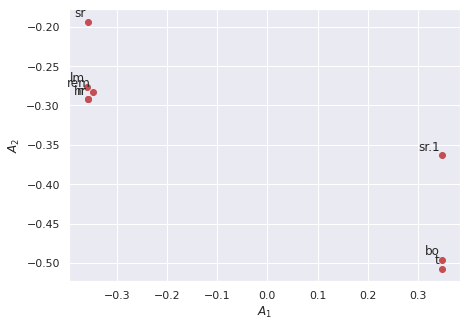

In [24]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
 plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


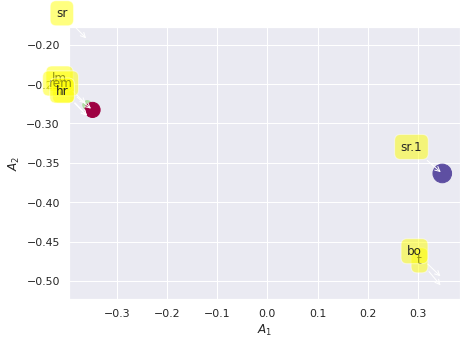

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([7.50905794e+00, 3.26465052e-01, 9.82004459e-02, 5.04414906e-02,
       2.35893398e-02, 3.46029125e-03, 1.50404020e-03, 1.14667028e-31])

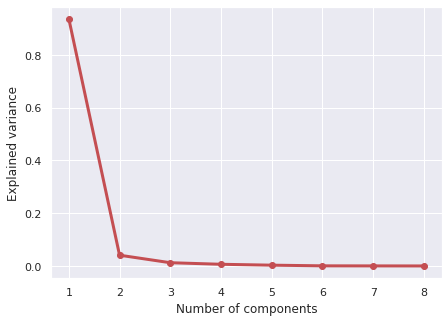

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

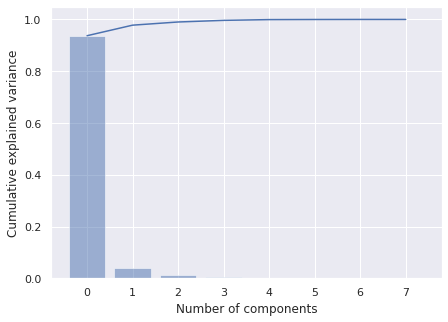

In [27]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([-8.78675000e-01, -5.96370360e-01, -8.01056864e-01,  1.72125605e-01,
       -3.30122326e-01, -3.17488481e-01,  1.18385427e-01, -1.08297462e+00,
        8.07165189e-01, -1.06702263e-01, -1.77328755e-01, -6.89464160e-01,
       -5.22339934e-01,  1.04759835e+00, -9.44954440e-02,  3.89265309e-01,
        3.39668552e-01,  1.09391240e-01,  7.21051294e-01,  6.81950290e-01,
       -5.43578840e-01, -5.15405756e-01,  1.46661705e-01, -1.25862626e-01,
       -3.76800084e-01,  1.78479091e-01, -6.28098090e-01,  6.00051527e-01,
       -1.00414373e+00,  8.22815707e-01, -7.30575676e-01,  1.06647489e+00,
       -1.53922852e-01, -1.08545089e+00,  1.00594075e+00,  4.66568760e-02,
       -4.74285532e-01, -2.73759587e-01,  4.70784375e-01, -3.87018839e-01,
        9.21421499e-01,  5.12911789e-01, -3.46367256e-01, -7.94648212e-01,
       -1.63242213e-01, -5.00278091e-01,  7.52382999e-01,  2.35907047e-01,
       -2.92690103e-01,  8.77709474e-01, -9.22793284e-01,  1.90878280e-01,
       -8.00257044e-01,  

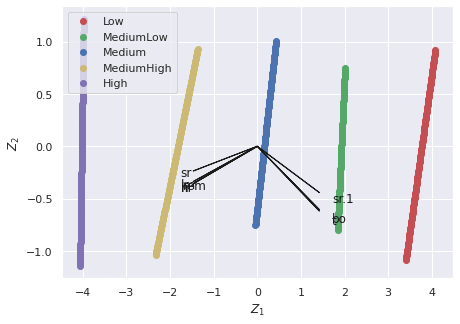

In [29]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Low,0], Z[idx_Low,1], c='r', label='Low')
plt.scatter(Z[idx_MediumLow,0], Z[idx_MediumLow,1], c='g', label='MediumLow')
plt.scatter(Z[idx_Medium,0], Z[idx_Medium,1], c='b', label='Medium')
plt.scatter(Z[idx_MediumHigh,0], Z[idx_MediumHigh,1], c='y', label='MediumHigh')
plt.scatter(Z[idx_High,0], Z[idx_High,1], c='m', label='High')

plt.legend(loc='upper left')
Z1
Z2

**# Using PCA Library**

In [30]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=5c5008570a8189784ef36cd178d214fdd8fc10fd43ae46441fcc6d54b58e38d6
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=f31f9f4e70924b4f4d5e132438e3f6372afc71a7452c713ea80f8874383733da
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [351]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [1] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[1]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [32]:
out['PC']

PC1       PC2
0   -2.250047 -0.878675
1   -2.111753 -0.596370
2    1.844494 -0.801057
3   -1.735288  0.172126
4    3.661345 -0.330122
..        ...       ...
625  0.203803  0.160748
626  3.618319 -0.458267
627 -4.010066  0.330290
628  1.867121 -0.590271
629  0.101487 -0.219588

[630 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33ff1f4550>)

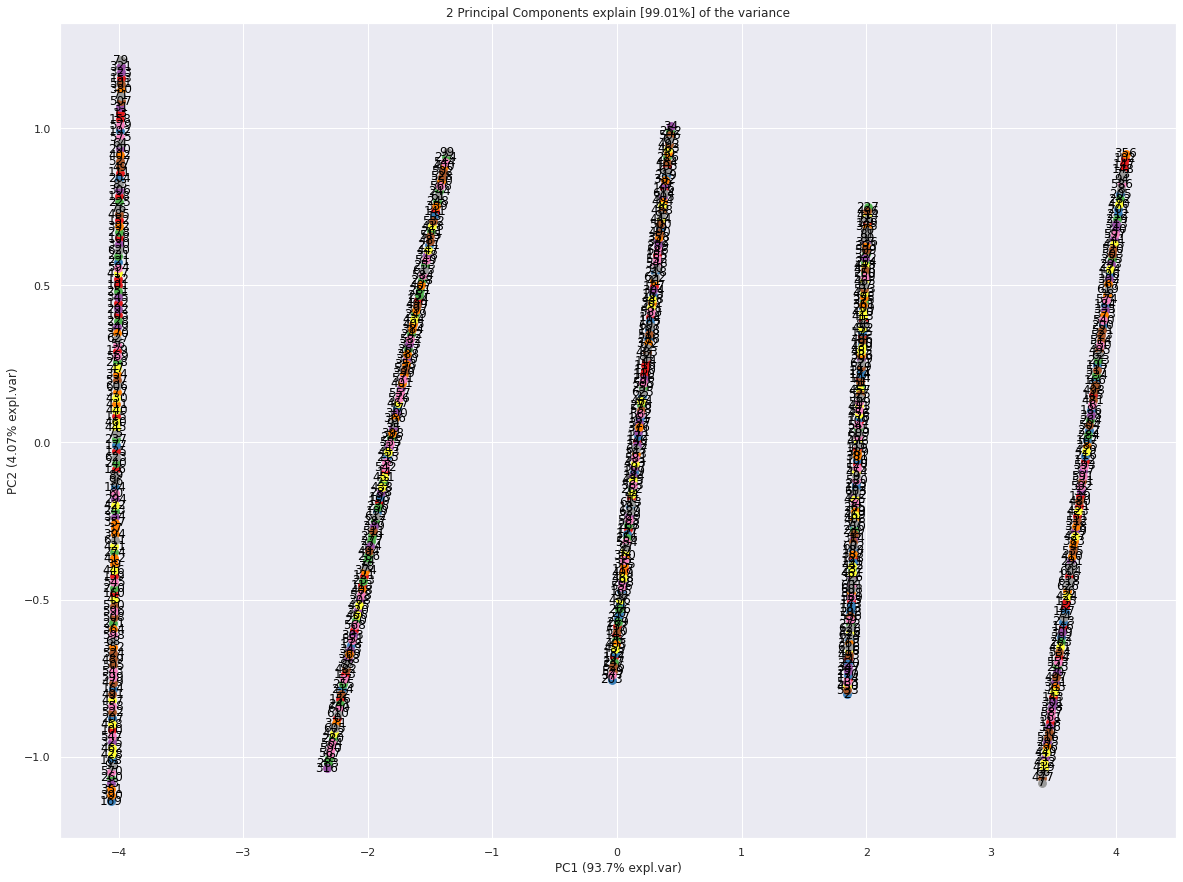

In [33]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [34]:
A = out['loadings'].T
A

PC1       PC2
sr   -0.359032 -0.193650
rr   -0.357372 -0.291870
t     0.348197 -0.507550
lm   -0.359764 -0.276555
bo    0.348335 -0.495934
rem  -0.349059 -0.282782
sr.1  0.349022 -0.363480
hr   -0.357372 -0.291870

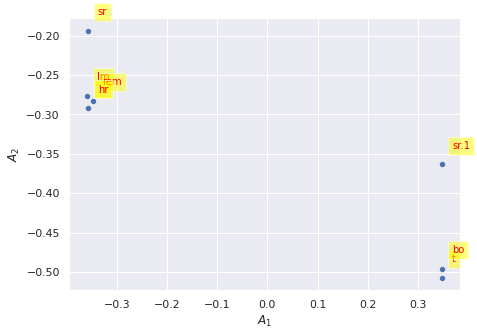

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

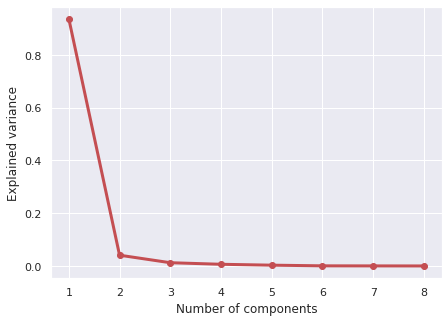

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

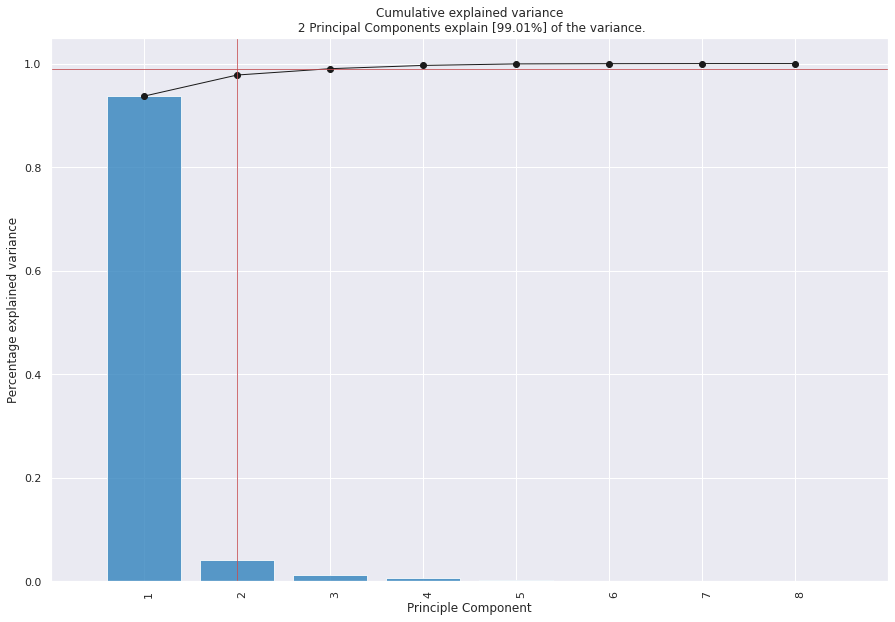

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [630] unique colors! Available unique colors: [9].


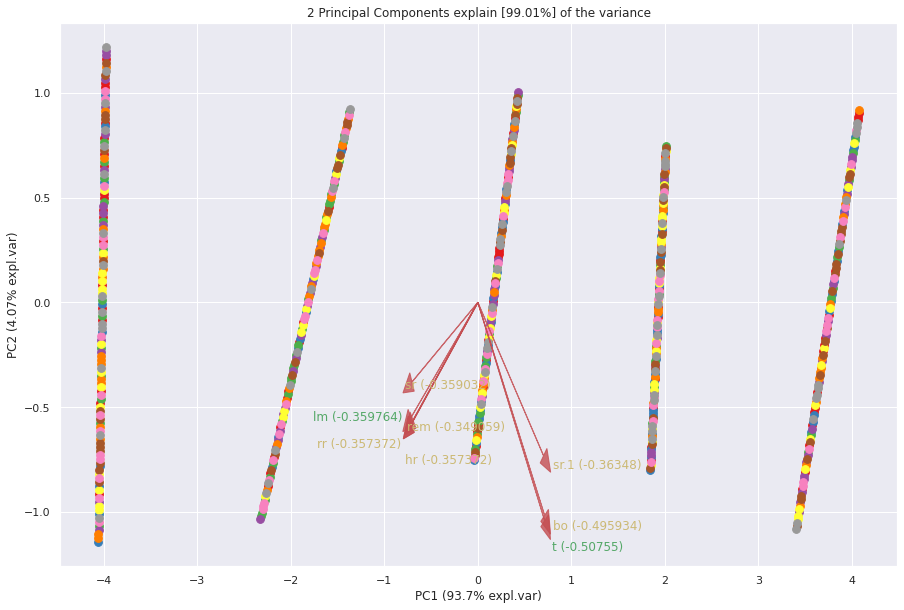

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33fe606490>)

In [38]:
model.biplot(label=False, legend=False)

In [39]:
print(out['topfeat'])

    PC feature   loading  type
0  PC1      lm -0.359764  best
1  PC2       t -0.507550  best
2  PC1      sr -0.359032  weak
3  PC1      rr -0.357372  weak
4  PC2      bo -0.495934  weak
5  PC1     rem -0.349059  weak
6  PC2    sr.1 -0.363480  weak
7  PC1      hr -0.357372  weak


**Classification using Pycaret**

At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found. Before applying PCA, the output from compare_models() function shows that Logistic Regression, K Neighbors Classifier, and Naive Bayes shows the best performance.

However, after applying PCA, these models shows similar performance and Therefore, I have taken Logistic Regression, K-nearest Neighbour and Naive Baye as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [40]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()
     

'2.3.6'

In [41]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [42]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (567, 9)
Unseen Data For Predictions: (63, 9)


In [43]:
from pycaret.classification import *
clf = setup(data=data, target='sl', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target                sl
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (567, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (396, 6)
12                    Transformed Test Set          (171, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              ed56
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sl',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [44]:
#show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    0.9975  1.0000  0.9975  0.9978   
lightgbm  Light Gradient Boosting Machine    0.9975  1.0000  0.9975  0.9978   
dt               Decision Tree Classifier    0.9899  0.9937  0.9903  0.9910   
gbc          Gradient Boosting Classifier    0.9898  1.0000  0.9899  0.9910   
ridge                    Ridge Classifier    0.8964  0.0000  0.8974  0.9228   
svm                   SVM - Linear Kernel    0.7501  0.0000  0.7449  0.6924   
ada                  Ada Boost Classifier    0.6086  0.8605  0.6003  0.5004   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   
qda       Quadratic Discriminant Analysis    0.1996  0.0000  0.2000  0.0399   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.555  
knn       1.0000  1.0000  1.0000     0.022  
nb        1.0000  1.0000  1.0000     0.025  
lda       1.0000  1.0000  1.0000     0.025  
et        1.0000  1.0000  1.0000     0.317  
rf        0.9975  0.9969  0.9970     0.280  
lightgbm  0.9975  0.9969  0.9970     0.173  
dt        0.9899  0.9873  0.9876     0.042  
gbc       0.9898  0.9872  0.9876     0.702  
ridge     0.8975  0.8706  0.8777     0.019  
svm       0.6931  0.6871  0.7180     0.021  
ada       0.5150  0.5113  0.6049     0.175  
dummy     0.0777  0.0000  0.0000     0.014  
qda       0.0665  0.0000  0.0000     0.027

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [45]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

**Logistic Regresssion**

In [46]:
lr = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune the model**

In [47]:
tuned_lr=tune_model(lr)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [48]:
tuned_lr

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**

In [49]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with K-nearest neighbour**

In [50]:
knn = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune model with K-nearest neighbour**

In [51]:
tuned_knn = tune_model(knn)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')
INFO:logs:tune_model() succesfully completed......................................


In [52]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance')

**Evaluate model with K-nearest neighbour**

In [53]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='distance'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create model with Naive Bayes**

In [54]:
nb=create_model('nb')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


**Tune NB Model**

In [55]:
tuned_nb=tune_model(nb)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate NB Model**

In [56]:
tuned_nb

GaussianNB(priors=None, var_smoothing=2e-09)

In [57]:
evaluate_model(tuned_nb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [58]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Classification + PCA**

In [59]:
clf_pca = setup(data=data, target='sl', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target                sl
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (567, 9)
5                           Missing Values             False
6                         Numeric Features                 8
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (396, 3)
12                    Transformed Test Set          (171, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              10f6
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='sl',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='sl')),
                ('fix_perfect', Remove_100(t

**Comparing Models**

In [60]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    1.0000  1.0000  1.0000  1.0000   
knn                K Neighbors Classifier    1.0000  1.0000  1.0000  1.0000   
nb                            Naive Bayes    1.0000  1.0000  1.0000  1.0000   
dt               Decision Tree Classifier    1.0000  1.0000  1.0000  1.0000   
rf               Random Forest Classifier    1.0000  1.0000  1.0000  1.0000   
qda       Quadratic Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
lda          Linear Discriminant Analysis    1.0000  1.0000  1.0000  1.0000   
et                 Extra Trees Classifier    1.0000  1.0000  1.0000  1.0000   
lightgbm  Light Gradient Boosting Machine    1.0000  1.0000  1.0000  1.0000   
gbc          Gradient Boosting Classifier    0.9975  1.0000  0.9975  0.9978   
svm                   SVM - Linear Kernel    0.8888  0.0000  0.8836  0.8736   
ridge                    Ridge Classifier    0.8254  0.0000  0.8211  0.8328   
ada                  Ada Boost Classifier    0.6085  0.8592  0.6000  0.4799   
dummy                    Dummy Classifier    0.2172  0.5000  0.2000  0.0473   

              F1   Kappa     MCC  TT (Sec)  
lr        1.0000  1.0000  1.0000     0.060  
knn       1.0000  1.0000  1.0000     0.031  
nb        1.0000  1.0000  1.0000     0.017  
dt        1.0000  1.0000  1.0000     0.017  
rf        1.0000  1.0000  1.0000     0.238  
qda       1.0000  1.0000  1.0000     0.017  
lda       1.0000  1.0000  1.0000     0.021  
et        1.0000  1.0000  1.0000     0.198  
lightgbm  1.0000  1.0000  1.0000     0.097  
gbc       0.9975  0.9969  0.9970     0.419  
svm       0.8663  0.8607  0.8768     0.025  
ridge     0.8204  0.7816  0.7857     0.017  
ada       0.5118  0.5113  0.6053     0.106  
dummy     0.0777  0.0000  0.0000     0.017

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


**Best model with PCA**

In [61]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Best Model**

In [63]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [65]:
lr_pca = create_model('lr')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Model**

In [291]:
tuned_lr_pca = tune_model(lr_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Model**

In [67]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
evaluate_model(tuned_lr_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K-nearest neighbour Model**

In [69]:
knn_pca = create_model('knn')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune Model**

In [70]:
tuned_knn_pca = tune_model(knn_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [71]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate Model KNN**

In [72]:
evaluate_model(tuned_knn_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Naive Bayes Model**

In [73]:
nb_pca = create_model('nb')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


**Tune model**

In [74]:
tuned_nb_pca = tune_model(nb_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Model**

In [292]:
tuned_nb_pca

GaussianNB(priors=None, var_smoothing=2e-09)

In [76]:
evaluate_model(tuned_nb_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Explainable AI with Shapley values**

For binary classification, AI shapley can only support tree based classification models. As none of the the best three models with highest accuracy (LR, KNN, NB) based on tree, I chose a fourth model "Extra tree classifier" for the AI Shapley analysis.

In [308]:
et_pca = create_model('et')

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [309]:
tuned_et_pca = tune_model(et_pca)

Accuracy  AUC  Recall  Prec.   F1  Kappa  MCC
0          1.0  1.0     1.0    1.0  1.0    1.0  1.0
1          1.0  1.0     1.0    1.0  1.0    1.0  1.0
2          1.0  1.0     1.0    1.0  1.0    1.0  1.0
3          1.0  1.0     1.0    1.0  1.0    1.0  1.0
4          1.0  1.0     1.0    1.0  1.0    1.0  1.0
5          1.0  1.0     1.0    1.0  1.0    1.0  1.0
6          1.0  1.0     1.0    1.0  1.0    1.0  1.0
7          1.0  1.0     1.0    1.0  1.0    1.0  1.0
8          1.0  1.0     1.0    1.0  1.0    1.0  1.0
9          1.0  1.0     1.0    1.0  1.0    1.0  1.0
Mean       1.0  1.0     1.0    1.0  1.0    1.0  1.0
SD         0.0  0.0     0.0    0.0  0.0    0.0  0.0

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [310]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [311]:
evaluate_model(tuned_et_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [312]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [313]:
import shap

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


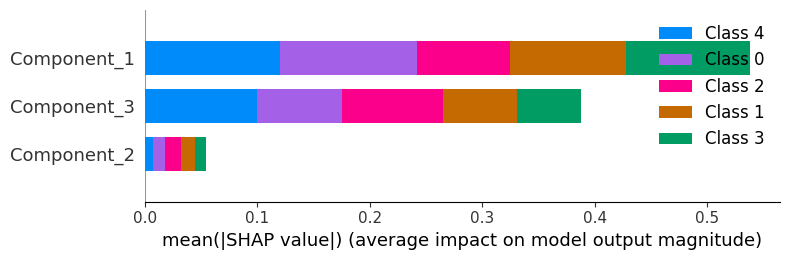

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [314]:
interpret_model(tuned_et_pca, plot='summary')

In [315]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [316]:
interpret_model(tuned_et_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Multi-Class Classification**

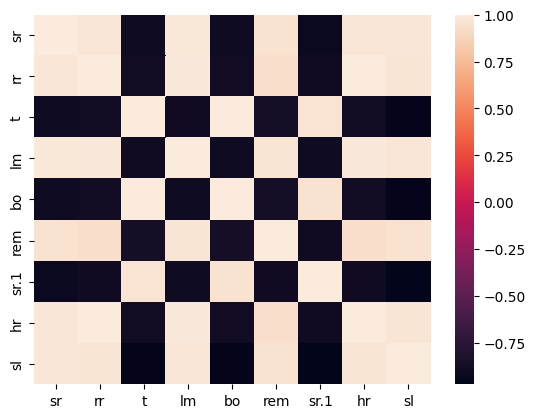

In [326]:
# Calculating the correlation matrix
corr = data.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

In [342]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8].values

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
Y_transformed = lab.fit_transform(Y)

#view transformed values
print(Y_transformed)

[3 3 1 3 0 1 0 0 0 1 2 1 0 4 3 1 1 3 3 2 2 2 2 3 3 1 2 1 3 2 0 4 0 4 2 3 0
 4 0 4 2 2 2 0 2 4 2 4 1 4 0 1 3 0 1 2 4 3 3 1 4 3 0 2 4 1 0 2 4 0 1 4 1 0
 0 4 4 1 3 4 1 1 1 4 2 1 1 1 3 4 2 3 2 4 0 2 4 2 2 3 4 4 0 4 1 2 2 2 4 1 2
 4 0 3 2 4 2 2 0 1 1 3 4 1 3 4 4 2 1 4 2 0 4 3 1 0 0 2 4 0 2 3 2 0 2 0 0 0
 0 1 3 0 4 4 0 2 3 2 4 4 4 2 1 2 4 2 0 0 4 4 1 2 2 1 1 1 1 4 3 1 1 1 2 1 0
 2 0 2 1 2 1 1 4 3 4 0 0 0 2 3 0 0 0 2 4 0 2 4 1 1 1 3 0 0 3 3 0 2 2 2 1 4
 0 1 3 4 2 1 4 0 3 4 1 3 0 0 3 4 3 1 4 3 3 4 3 0 3 2 3 3 1 4 2 3 1 3 2 3 4
 2 4 3 2 0 0 1 2 3 2 2 4 4 1 0 4 1 2 3 4 3 3 3 0 3 0 1 3 3 3 2 4 0 4 0 4 0
 2 1 2 1 3 0 0 3 2 2 4 2 3 0 3 2 1 0 1 0 3 3 3 0 3 4 2 4 3 4 1 2 0 2 4 0 1
 3 4 0 1 0 0 3 0 0 2 3 2 4 0 1 3 4 3 4 4 3 4 2 0 4 2 3 2 1 2 2 4 0 3 0 1 3
 4 3 2 0 3 1 2 4 0 1 4 1 2 0 3 0 1 1 3 1 4 1 4 1 4 1 0 3 3 3 3 3 4 2 2 3 1
 3 3 2 0 4 4 1 1 0 1 4 3 0 1 4 4 0 0 1 1 0 4 0 4 2 0 2 3 2 2 4 3 1 4 1 1 1
 2 4 4 3 2 0 1 3 1 3 1 1 1 1 4 2 4 1 4 2 2 1 3 3 2 1 0 0 3 1 0 3 1 0 1 4 0
 0 3 2 2 4 1 3 2 4 2 4 2 

In [343]:
X = df.drop('sl', axis=1)
Y = df['sl']

In [344]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')  

Train Dataset Size: 441
Test Dataset Size: 189


**Naive Bayes (NB)**

Accuracy of naive bayes classifier on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        37
           1      1.000     1.000     1.000        34
           2      1.000     1.000     1.000        40
           3      1.000     1.000     1.000        36
           4      1.000     1.000     1.000        42

    accuracy                          1.000       189
   macro avg      1.000     1.000     1.000       189
weighted avg      1.000     1.000     1.000       189



Text(0.5, 427.9555555555555, 'Predicted label')

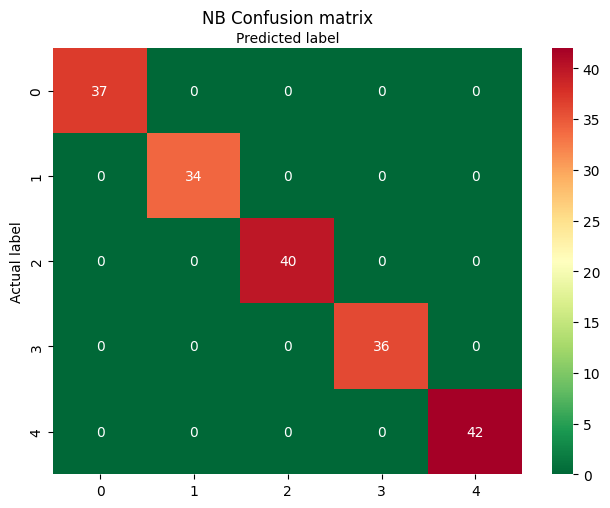

In [345]:
# instantiate the model (using the default parameters)
nb = GaussianNB()

# fit the model with data
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))

# generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=3))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('NB Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


**K Nearest Neighbors (KNN)**

Accuracy of k-nearest neighbor classifier on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        37
           1      1.000     1.000     1.000        34
           2      1.000     1.000     1.000        40
           3      1.000     1.000     1.000        36
           4      1.000     1.000     1.000        42

    accuracy                          1.000       189
   macro avg      1.000     1.000     1.000       189
weighted avg      1.000     1.000     1.000       189



Text(0.5, 427.9555555555555, 'Predicted label')

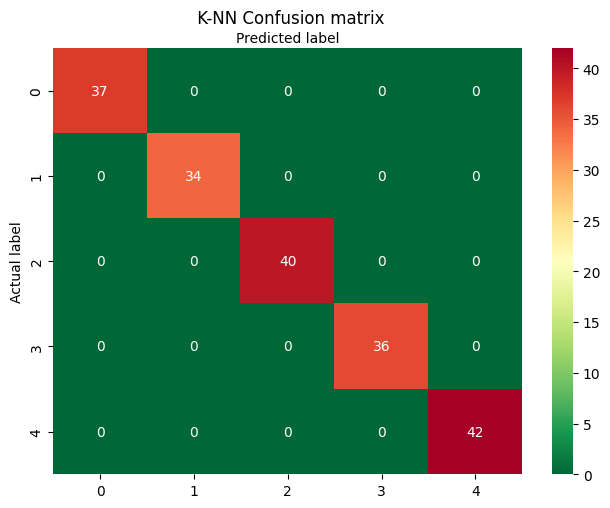

In [346]:
# instantiate the model (using the default parameters)
knn = KNeighborsClassifier()

# fit the model with data
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy of k-nearest neighbor classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

# generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=3))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title(' K-NN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Logistic Regression**

Accuracy of logistic regression classifier on test set: 1.00
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        37
           1      1.000     1.000     1.000        34
           2      1.000     1.000     1.000        40
           3      1.000     1.000     1.000        36
           4      1.000     1.000     1.000        42

    accuracy                          1.000       189
   macro avg      1.000     1.000     1.000       189
weighted avg      1.000     1.000     1.000       189



Text(0.5, 445.55555555555554, 'Predicted label')

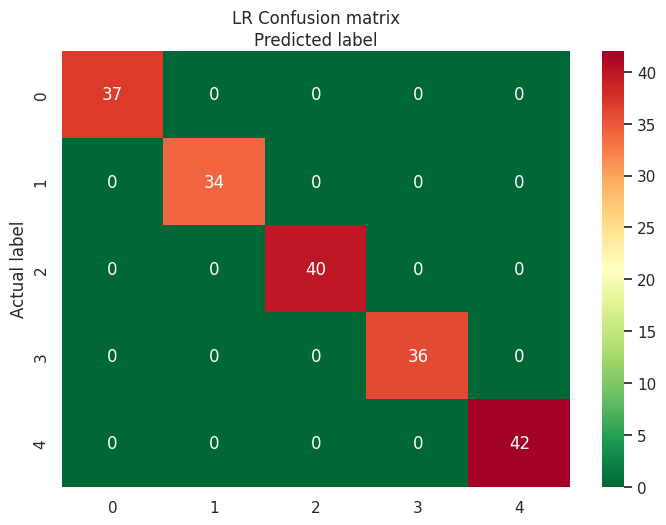

In [354]:
# instantiate the model (using the default parameters)
lr = LogisticRegression()

# fit the model with data
lr.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

# generate classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=3))

#confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1,2,3,4] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn_r" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('LR Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**ROC Curves**

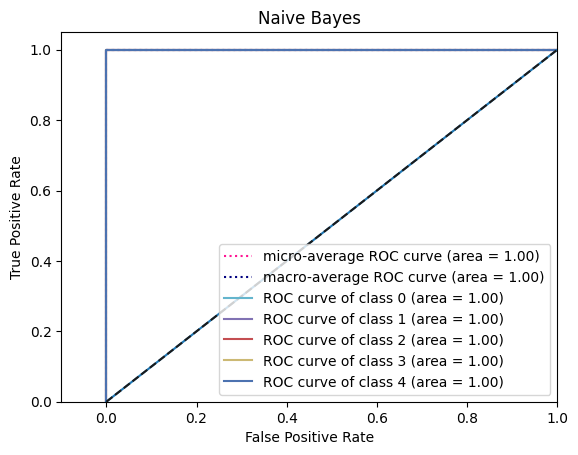

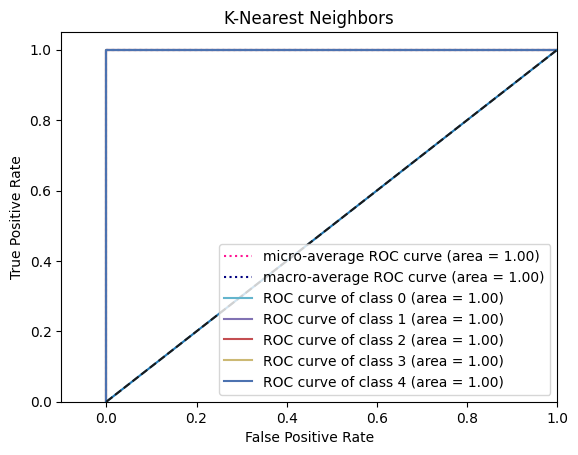

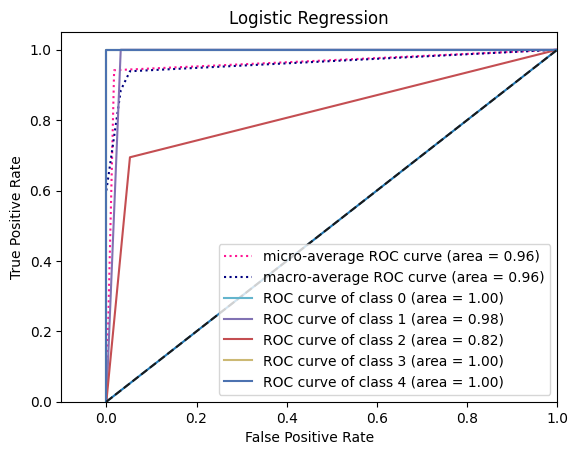

In [340]:
mpl.rcParams.update(mpl.rcParamsDefault)
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
datasets = [('FULL DATA', X_train, y_train, X_test, y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2, 3, 4])
  y_test = label_binarize(y_tst, classes=[0, 1, 2, 3, 4])
  n_classes = y_train.shape[1]

  list_algos = [nb, knn, lr]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Logistic Regression']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r', 'y','b'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], [0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()